# SYNTHETIC DATA IN R


In [ ]:
# Checking R version
version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          3.2                         
year           2023                        
month          10                          
day            31                          
svn rev        85441                       
language       R                           
version.string R version 4.3.2 (2023-10-31)
nickname       Eye Holes                   

In [2]:

## Python equivalent = FAKER
if(!require(synthpop)){
     install.packages('synthpop',repos='http://cran.es.r-project.org')
     require(synthpop)
}


if(!require(readxl)){
    install.packages('readxl',repos='http://cran.es.r-project.org')
    require(readxl)
}

Loading required package: synthpop

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘synthpop’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘TH.data’, ‘libcoin’, ‘matrixStats’, ‘multcomp’, ‘proxy’, ‘truncnorm’, ‘mvtnorm’, ‘modeltools’, ‘strucchange’, ‘coin’, ‘zoo’, ‘sandwich’, ‘Rcpp’, ‘RcppEigen’, ‘e1071’, ‘cmm’, ‘Rsolnp’, ‘numDeriv’, ‘party’, ‘plyr’, ‘proto’, ‘polspline’, ‘randomForest’, ‘ranger’, ‘classInt’, ‘mipfp’, ‘rmutil’, ‘broman’


Loading required package: synthpop

Find out more at https://www.synthpop.org.uk/

Loading required package: readxl



## Creating data from scratch

* ### Linear congruential generator: $X_{i+1} = ( a X_i + c )~$mod$~m $c

In [243]:
# Linear congruential generator

m <- 2 ** 32
a <- 1103515245
c <- 12345

x = vector(length=5)
#x = c(0,0,0,0,0)

seed = round(as.numeric(Sys.time()))
d = seed
d <- (a*d + c) %% m
x[1] = d/m
d <- (a*d + c) %% m
x[2] = d/m
d <- (a*d + c) %% m
x[3] = d/m
d <- (a*d + c) %% m
x[4] = d/m
d <- (a*d + c) %% m
x[5] = d/m

x


[1] 0.3429886 0.5170720 0.9971752 0.5368280 0.2715836

* ###  Inverse Transform Theorem:
$\rightarrow$ If $X$ is a continuous random variable with cdf $F(X)$ then $F(X) \sim U(0,1)$ $\Rightarrow F^{-1}(U(0,1))$ is a sample from $f(X)$

In [247]:
# Inverse Transfom Theorem
qnorm(x[1],mean=0,sd=1)
qnorm(x[2],mean=0,sd=1)
qnorm(x[3],mean=0,sd=1)
qnorm(x[4],mean=0,sd=1)
qnorm(x[5],mean=0,sd=1)

[1] -0.4043204

[1] 0.04280628

[1] 2.767456

[1] 0.09244572

[1] -0.6080307

* ### Monte Carlo Simulation:
$\rightarrow$ Simple example: $y_i = 2 + 0.5 x_i + \varepsilon_i$ where $\varepsilon \sim N(0,1)$

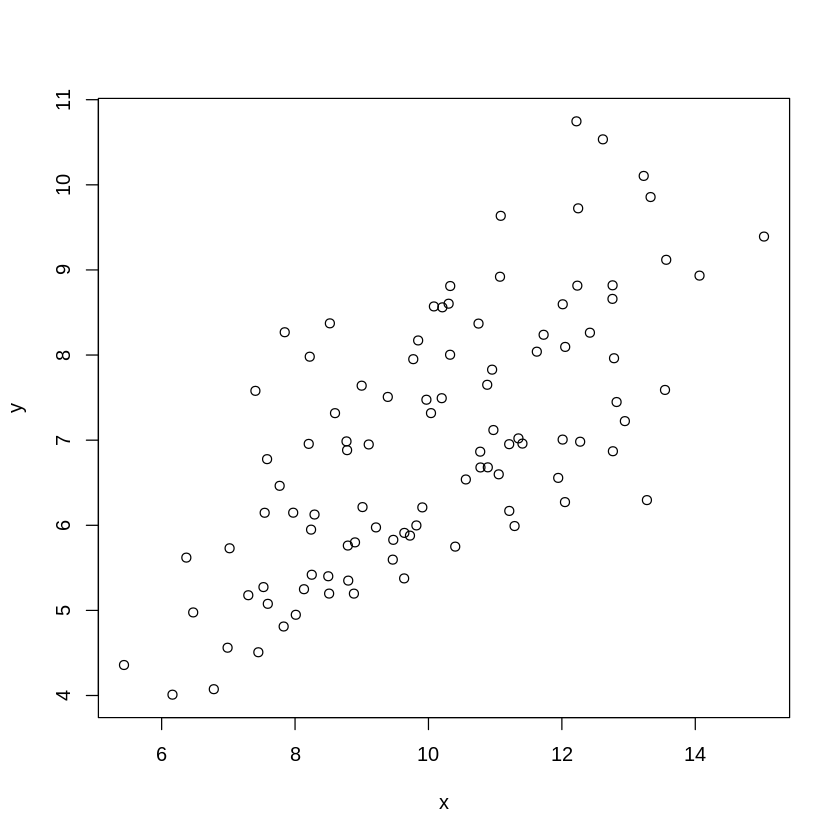

In [250]:
# Monte Carlo Simulation
x <- rnorm(100,10,2)
y = 2 + 0.5*x + rnorm(100,0,1)

plot(x,y)


In [253]:
lrm <- lm(y ~ x)
summary(lrm)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3061 -0.8748 -0.1713  0.6660  2.6739 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.94445    0.54634   3.559 0.000576 ***
x            0.50151    0.05328   9.414 2.27e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.092 on 98 degrees of freedom
Multiple R-squared:  0.4749,	Adjusted R-squared:  0.4695 
F-statistic: 88.62 on 1 and 98 DF,  p-value: 2.27e-15


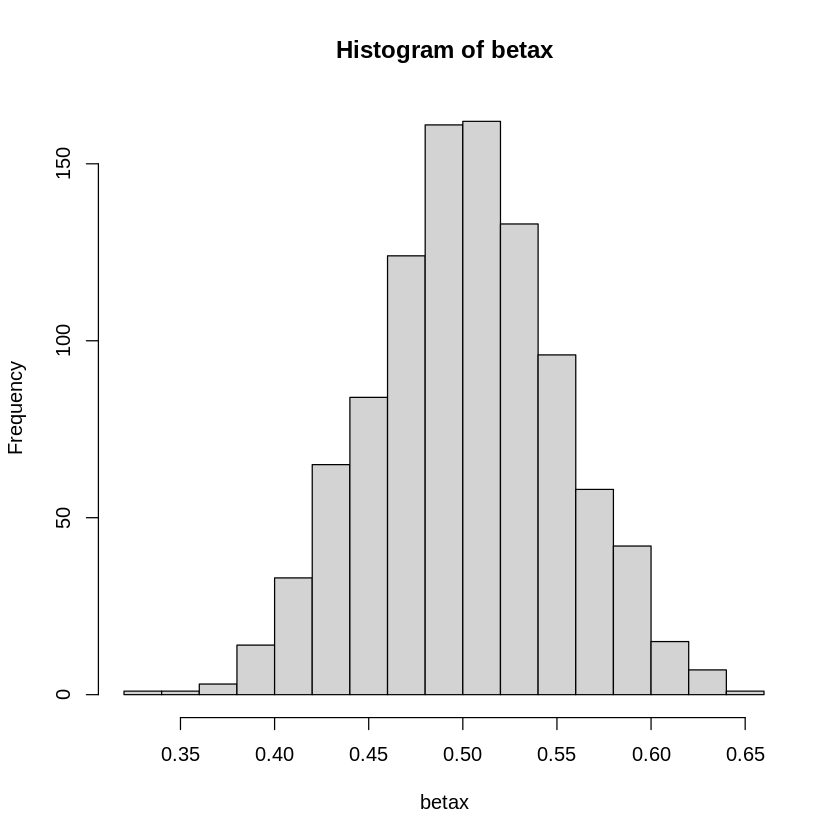

In [271]:
n = 1000
betax = vector(length=n)
for (i in 1:n) {
x <- rnorm(100,10,2)
y = 2 + 0.5*x + rnorm(100,0,1)
lrm <- lm(y ~ x)
betax[i] = lrm$coefficients[2]
}

hist(betax,breaks=20)



## Mimicking real data

* ### Naive parametric approach

[1] "assign"        "call"          "coefficients"  "df.residual"  
 [5] "effects"       "fitted.values" "model"         "qr"           
 [9] "rank"          "residuals"     "terms"         "xlevels"

[1] 1.086116

(Intercept) 
   1.944453

x 
0.5015087

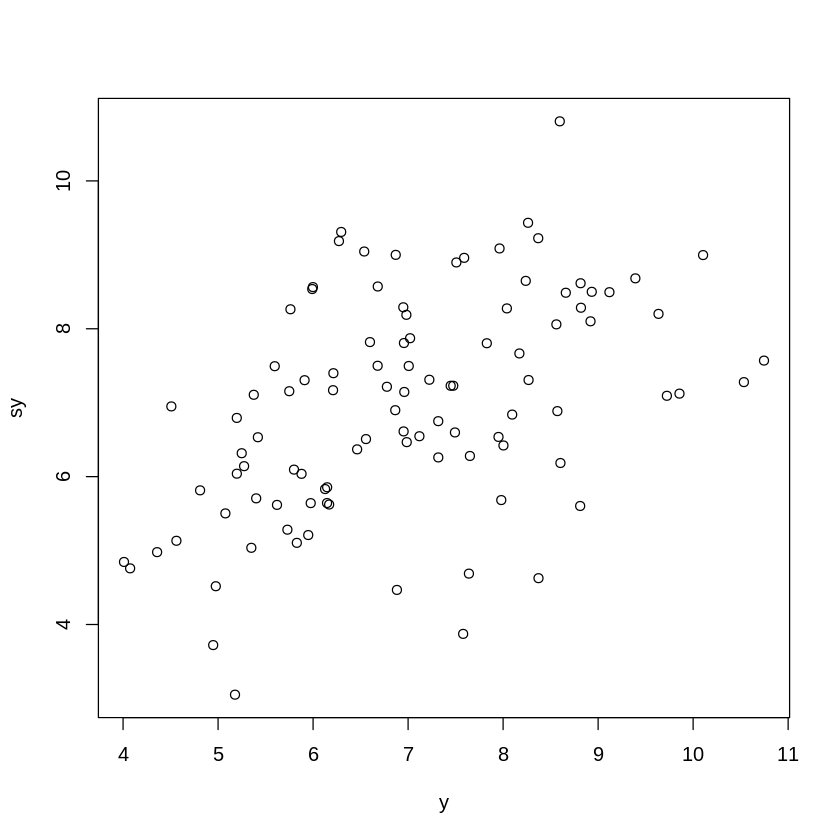

In [267]:
ls(lrm)

sqrt(var(lrm$residuals))
lrm$coefficients[1]
lrm$coefficients[2]

sy =  lrm$coefficients[1] + lrm$coefficients[2]*x + rnorm(100,0,sqrt(var(lrm$residuals)))

plot(y,sy)

* ### Smart approach: (Titanic dataset as example)
$\rightarrow P(z_1,z_2,z_3|\theta) = P(z_3|z_1,z_2,\theta)P(z_1,z_2|\theta) =  P(z_3|z_1,z_2,\theta)P(z_2|z_1\theta)P(z_1|\theta)$



In [82]:
rawdfna <- read.csv('/content/sample_data/titanic3.csv')
#df <- read_excel('/content/sample_data/titanic3.xlsx')

head(rawdfna)
str(rawdfna)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
1,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NA,"St Louis, MO"
2,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NA,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,,135,"Montreal, PQ / Chesterville, ON"
5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
6,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NA,"New York, NY"


'data.frame':	1309 obs. of  14 variables:
 $ pclass   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ survived : int  1 1 0 0 0 1 1 0 1 0 ...
 $ name     : chr  "Allen, Miss. Elisabeth Walton" "Allison, Master. Hudson Trevor" "Allison, Miss. Helen Loraine" "Allison, Mr. Hudson Joshua Creighton" ...
 $ sex      : chr  "female" "male" "female" "male" ...
 $ age      : num  29 0.92 2 30 25 48 63 39 53 71 ...
 $ sibsp    : int  0 1 1 1 1 0 1 0 2 0 ...
 $ parch    : int  0 2 2 2 2 0 0 0 0 0 ...
 $ ticket   : chr  "24160" "113781" "113781" "113781" ...
 $ fare     : num  211 152 152 152 152 ...
 $ cabin    : chr  "B5" "C22 C26" "C22 C26" "C22 C26" ...
 $ embarked : chr  "S" "S" "S" "S" ...
 $ boat     : chr  "2" "11" "" "" ...
 $ body     : int  NA NA NA 135 NA NA NA NA NA 22 ...
 $ home.dest: chr  "St Louis, MO" "Montreal, PQ / Chesterville, ON" "Montreal, PQ / Chesterville, ON" "Montreal, PQ / Chesterville, ON" ...


In [83]:
dfna <- rawdfna[c('survived','sex','age','pclass','sibsp')]
head(dfna)
str(dfna)

,survived,sex,age,pclass,sibsp
,<int>,<chr>,<dbl>,<int>,<int>
1,1,female,29.00,1,0
2,1,male,0.92,1,1
3,0,female,2.00,1,1
4,0,male,30.00,1,1
5,0,female,25.00,1,1
6,1,male,48.00,1,0


'data.frame':	1309 obs. of  5 variables:
 $ survived: int  1 1 0 0 0 1 1 0 1 0 ...
 $ sex     : chr  "female" "male" "female" "male" ...
 $ age     : num  29 0.92 2 30 25 48 63 39 53 71 ...
 $ pclass  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ sibsp   : int  0 1 1 1 1 0 1 0 2 0 ...


In [ ]:
dfna[, 'survived'] <- as.factor(dfna[, 'survived'])
dfna[, 'sex'] <- as.factor(dfna[, 'sex'])
dfna[, 'pclass'] <- as.factor(dfna[, 'pclass'])
str(dfna)

In [84]:
sum(is.na(dfna$survived))
sum(is.na(dfna$sex))
sum(is.na(dfna$age))
sum(is.na(dfna$pclass))
sum(is.na(dfna$sibsp))

[1] 0

[1] 0

[1] 263

[1] 0

[1] 0

In [86]:
df <- na.omit(dfna)
head(df)
str(df)

,survived,sex,age,pclass,sibsp
,<fct>,<fct>,<dbl>,<fct>,<int>
1,1,female,29.00,1,0
2,1,male,0.92,1,1
3,0,female,2.00,1,1
4,0,male,30.00,1,1
5,0,female,25.00,1,1
6,1,male,48.00,1,0


'data.frame':	1046 obs. of  5 variables:
 $ survived: Factor w/ 2 levels "0","1": 2 2 1 1 1 2 2 1 2 1 ...
 $ sex     : Factor w/ 2 levels "female","male": 1 2 1 2 1 2 1 2 1 2 ...
 $ age     : num  29 0.92 2 30 25 48 63 39 53 71 ...
 $ pclass  : Factor w/ 3 levels "1","2","3": 1 1 1 1 1 1 1 1 1 1 ...
 $ sibsp   : int  0 1 1 1 1 0 1 0 2 0 ...
 - attr(*, "na.action")= 'omit' Named int [1:263] 16 38 41 47 60 70 71 75 81 107 ...
  ..- attr(*, "names")= chr [1:263] "16" "38" "41" "47" ...


# Synthetic conditional data generation with SYNTHPOP
$\rightarrow P(z_1,z_2,z_3|\theta) = P(z_3|z_1,z_2,\theta)P(z_1,z_2|\theta) =  P(z_3|z_1,z_2,\theta)P(z_2|z_1\theta)P(z_1|\theta)$

## References:

[Synthpop](https://cran.r-project.org/web/packages/synthpop/vignettes/synthpop.pdf)

[function: syn](https://search.r-project.org/CRAN/refmans/synthpop/html/syn.html)

[function: compare](https://rdrr.io/cran/synthpop/man/compare.synds.html)

In [218]:
semilla <- 17914709
#synth_df <- syn(dfna,k=1309,m=1,method=cart,seed=semilla)
synth_df <- syn(df,k=1046,m=2,method="cart",seed=semilla)




Synthesis number 1
--------------------
 survived sex age pclass sibsp

Synthesis number 2
--------------------
 survived sex age pclass sibsp


In [219]:

df1 = data.frame(synth_df$syn[1])
df2 = data.frame(synth_df$syn[2])

head(df)
head(df1)
head(df2)



,survived,sex,age,pclass,sibsp
,<fct>,<fct>,<dbl>,<fct>,<int>
1,1,female,29.00,1,0
2,1,male,0.92,1,1
3,0,female,2.00,1,1
4,0,male,30.00,1,1
5,0,female,25.00,1,1
6,1,male,48.00,1,0


,survived,sex,age,pclass,sibsp
,<fct>,<fct>,<dbl>,<fct>,<dbl>
1,0,male,22,3,0
2,0,male,44,2,2
3,0,female,24,2,0
4,1,female,48,1,1
5,1,female,24,2,2
6,0,male,21,3,0


,survived,sex,age,pclass,sibsp
,<fct>,<fct>,<dbl>,<fct>,<dbl>
1,1,female,24,1,3
2,0,male,41,1,0
3,1,male,3,3,1
4,1,male,23,3,0
5,0,female,10,3,4
6,1,male,3,2,1


S_pMSE used on plots added to table of results.



Comparing percentages observed with synthetic


Selected utility measures:
             pMSE   S_pMSE
survived 0.000060 1.007491
sex      0.000041 0.687792
age      0.000265 1.109466

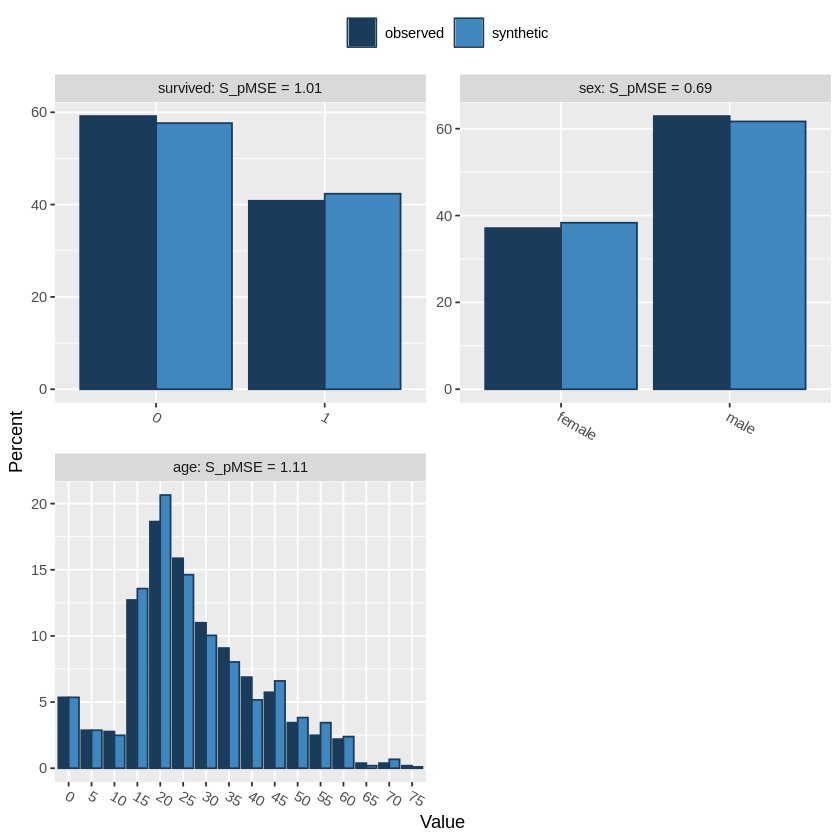

In [225]:
# propensity score mean square errors, frequency tables and histograms
#help(compare)

compare(df1,df,utility.stats = "pMSE",vars = c('survived','sex','age'))
#compare(df2,df,vars = c('survived','sex','age'))



# Propensity score mean square error:
$\rightarrow pMSE = (1/N)\sum (\hat{p}_i-c)^2$ where  $N =n_1+n_2$ y $c = n2/(n1+n2)$


In [191]:
model.df <- glm(survived ~ sex + age + pclass + sibsp, family = "binomial", data = df)
model.df


Call:  glm(formula = survived ~ sex + age + pclass + sibsp, family = "binomial", 
    data = df)

Coefficients:
(Intercept)      sexmale          age      pclass2      pclass3        sibsp  
    3.94752     -2.58022     -0.03968     -1.36868     -2.35008     -0.32920  

Degrees of Freedom: 1045 Total (i.e. Null);  1040 Residual
Null Deviance:	    1415 
Residual Deviance: 970.7 	AIC: 982.7

In [188]:
model1 <- glm(survived ~ sex + age + pclass + sibsp, family = "binomial", data=synth_df$syn)
model1


Call:  glm(formula = survived ~ sex + age + pclass + sibsp, family = "binomial", 
    data = synth_df$syn)

Coefficients:
(Intercept)      sexmale          age      pclass2      pclass3        sibsp  
    4.13249     -2.84423     -0.04364     -0.96024     -2.21484     -0.36137  

Degrees of Freedom: 1045 Total (i.e. Null);  1040 Residual
Null Deviance:	    1425 
Residual Deviance: 937.9 	AIC: 949.9

In [ ]:
##### TRUE DATA GENERATING PROCESS ######

# Fix the seed of random number generator
#semilla = round(as.numeric(Sys.time()))
semilla = sample(1:10000000,1)
semilla = 1680725
set.seed(semilla)
#set.seed(NULL)
cat('Seed =',semilla)

n = 600; p = 150
inputs <- matrix(rnorm(n*p),c(n,p))

beta = sort(seq(0,1,length.out=p),decreasing=TRUE)

intercept = 0.33
betaplus = c(intercept,beta)
target = intercept + inputs%*%beta + rnorm(n)